<a href="https://colab.research.google.com/github/marcon21/anlp-labs/blob/main/04_ANLP_Statistical_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Done by Daniel Marcon

Start by copying this into your Google Drive!!

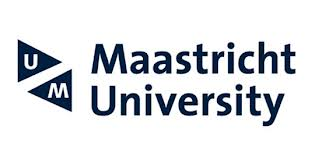


# Faculty of Science and Engineering - Department of Advanced Computer Sciences Course Advanced Natural Language Processing (ANLP) - Tutorial Tokenization



By Jan Scholtes

Version 2024-2025.1

Welcome to the tutorial on statistical methods in NLP. In this notebook you will learn how we can overcome some of the limitations of traditional, grammar-based approaches (dealing with ambiguity, but also with wrong spelling or wrong grammatical use of words and other unexpected situations).

This will help you understand why statistical and deep-learning methods are so much better for many of the NLP tasks we discuss in this course.

In this notebook, we will use the Stanford NLTK library.

Hidden Markov Models (HMMs) largely used to assign the correct label sequence
to sequential data or assess the probability of a given label and data
sequence. These models are finite state machines characterised by a number of
states, transitions between these states, and output symbols emitted while in
each state. The HMM is an extension to the Markov chain, where each state
corresponds deterministically to a given event. In the HMM the observation is
a probabilistic function of the state. HMMs share the Markov chain's
assumption, being that the probability of transition from one state to another
only depends on the current state - i.e. the series of states that led to the
current state are not used. They are also time invariant.

The HMM is a directed graph, with probability weighted edges (representing the
probability of a transition between the source and sink states) where each
vertex emits an output symbol when entered. The symbol (or observation) is
non-deterministically generated. For this reason, knowing that a sequence of
output observations was generated by a given HMM does not mean that the
corresponding sequence of states (and what the current state is) is known.
This is the 'hidden' in the hidden markov model.

Formally, a HMM can be characterised by:

- the output observation alphabet. This is the set of symbols which may be
  observed as output of the system.
- the set of states.
- the transition probabilities *a_{ij} = P(s_t = j | s_{t-1} = i)*. These
  represent the probability of transition to each state from a given state.
- the output probability matrix *b_i(k) = P(X_t = o_k | s_t = i)*. These
  represent the probability of observing each symbol in a given state.
- the initial state distribution. This gives the probability of starting
  in each state.

To ground this discussion, take a common NLP application, part-of-speech (POS)
tagging. An HMM is desirable for this task as the highest probability tag
sequence can be calculated for a given sequence of word forms. This differs
from other tagging techniques which often tag each word individually, seeking
to optimise each individual tagging greedily without regard to the optimal
combination of tags for a larger unit, such as a sentence. The HMM does this
with the Viterbi algorithm, which efficiently computes the optimal path
through the graph given the sequence of words forms.

In POS tagging the states usually have a 1:1 correspondence with the tag
alphabet - i.e. each state represents a single tag. The output observation
alphabet is the set of word forms (the lexicon), and the remaining three
parameters are derived by a training regime. With this information the
probability of a given sentence can be easily derived, by simply summing the
probability of each distinct path through the model. Similarly, the highest
probability tagging sequence can be derived with the Viterbi algorithm,
yielding a state sequence which can be mapped into a tag sequence.

This discussion assumes that the HMM has been trained. This is probably the
most difficult task with the model, and requires either Maximum Likelihood Estimation (MLE) estimates of the
parameters or unsupervised learning using the Baum-Welch algorithm, a variant
of Entropy Modeling (EM).

Let's start training a HMM model and takeit from there...

# Hidden Markov Models



Training a HMM model for POS tagging

First import probability FreqDist

We will use the Penn treebank corpus in the NLTK data to train the HMM tagger. To import the treebank use the following code:

In [1]:
# install requirements
!pip install python-crfsuite
!pip install sklearn-crfsuite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.5 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('treebank')
from nltk.corpus import treebank

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


In [3]:
from nltk.probability import FreqDist

Let's take a look at the distribution of tags in the corpus

In [4]:
fd = FreqDist()
for word, tag in treebank.tagged_words():
    fd[tag] += 1
fd.items()

dict_items([('NNP', 9410), (',', 4886), ('CD', 3546), ('NNS', 6047), ('JJ', 5834), ('MD', 927), ('VB', 2554), ('DT', 8165), ('NN', 13166), ('IN', 9857), ('.', 3874), ('VBZ', 2125), ('VBG', 1460), ('CC', 2265), ('VBD', 3043), ('VBN', 2134), ('-NONE-', 6592), ('RB', 2822), ('TO', 2179), ('PRP', 1716), ('RBR', 136), ('WDT', 445), ('VBP', 1321), ('RP', 216), ('PRP$', 766), ('JJS', 182), ('POS', 824), ('``', 712), ('EX', 88), ("''", 694), ('WP', 241), (':', 563), ('JJR', 381), ('WRB', 178), ('$', 724), ('NNPS', 244), ('WP$', 14), ('-LRB-', 120), ('-RRB-', 126), ('PDT', 27), ('RBS', 35), ('FW', 4), ('UH', 3), ('SYM', 1), ('LS', 13), ('#', 16)])

We need to import the HMM module as well, using the following code:

In [5]:
from nltk.tag import hmm

We can instantiate a HMM-Trainer object and assign it to a trainer variable using:

In [6]:
trainer = hmm.HiddenMarkovModelTrainer()

We can investigate the tagged words in the corpus:

In [7]:
treebank.tagged_words()[:10]

[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT')]

The following function returns the first two tagged sentences from the corpus:

In [8]:
treebank.tagged_sents()[:2]


[[('Pierre', 'NNP'),
  ('Vinken', 'NNP'),
  (',', ','),
  ('61', 'CD'),
  ('years', 'NNS'),
  ('old', 'JJ'),
  (',', ','),
  ('will', 'MD'),
  ('join', 'VB'),
  ('the', 'DT'),
  ('board', 'NN'),
  ('as', 'IN'),
  ('a', 'DT'),
  ('nonexecutive', 'JJ'),
  ('director', 'NN'),
  ('Nov.', 'NNP'),
  ('29', 'CD'),
  ('.', '.')],
 [('Mr.', 'NNP'),
  ('Vinken', 'NNP'),
  ('is', 'VBZ'),
  ('chairman', 'NN'),
  ('of', 'IN'),
  ('Elsevier', 'NNP'),
  ('N.V.', 'NNP'),
  (',', ','),
  ('the', 'DT'),
  ('Dutch', 'NNP'),
  ('publishing', 'VBG'),
  ('group', 'NN'),
  ('.', '.')]]

In [9]:
print("Total tagged sentences: ")
print(len(treebank.tagged_sents()))

Total tagged sentences: 
3914


Supervised training maximising the joint probability of the symbol and
state sequences. This is done via collecting frequencies of
transitions between states, symbol observations while within each
state and which states start a sentence. These frequency distributions
are then normalised into probability estimates, which can be
smoothed if desired.

It is also possible to train the HMM unsupervised. We will get back to that later in the Entropy Modeling section.

The NLTK HMM-module offers supervised and unsupervised training methods. Here we train an HMM using a supervised (or Maximum Likelihood Estimate) method:

In [10]:
tagger = trainer.train_supervised(treebank.tagged_sents())

What is in the tagger?

In [11]:
tagger

<HiddenMarkovModelTagger 46 states and 12408 output symbols>

Using a HMM model for POS tagging. First load a tokenizer from NLTK

In [14]:
nltk.download('punkt_tab')
from nltk import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [15]:
word_tokenize("Today is a good day.")

['Today', 'is', 'a', 'good', 'day', '.']

Next, load the tokenized structure into the HMM tagger

In [16]:
tagger.tag(word_tokenize("Today is a good day. Yesterday was also a great day"))

/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:333: RuntimeWarning: overflow encountered in cast
  X[i, j] = self._transitions[si].logprob(self._states[j])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:335: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])
/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:331: RuntimeWarning: overflow encountered in cast
  P[i] = self._priors.logprob(si)


[('Today', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('day', 'NN'),
 ('.', '.'),
 ('Yesterday', 'NN'),
 ('was', 'VBD'),
 ('also', 'RB'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('day', 'NN')]

Let's take a look at the probability of this sequence.

In [17]:
tagger.probability(tagger.tag(word_tokenize("Today is a good day. Yesterday was also a great day")))

1.5441272451891009e-34

As we discussed, probabilities can become very small, resulting in a floating point under flow. This is why we aften use log probability.

In [18]:
tagger.log_probability(tagger.tag(word_tokenize("Today is a good day. Yesterday was also a great day")))

-112.31876358208815

In [21]:
tagger.tag(word_tokenize("Jan Scholtes is a name that does not occur in the corpus. What do you observe? Can you explain?"))

[('Jan', 'NNP'),
 ('Scholtes', 'NNP'),
 ('is', 'NNP'),
 ('a', 'NNP'),
 ('name', 'NNP'),
 ('that', 'NNP'),
 ('does', 'NNP'),
 ('not', 'NNP'),
 ('occur', 'NNP'),
 ('in', 'NNP'),
 ('the', 'NNP'),
 ('corpus', 'NNP'),
 ('.', 'NNP'),
 ('What', 'NNP'),
 ('do', 'NNP'),
 ('you', 'NNP'),
 ('observe', 'NNP'),
 ('?', 'NNP'),
 ('Can', 'NNP'),
 ('you', 'NNP'),
 ('explain', 'NNP'),
 ('?', 'NNP')]

In [19]:
tagger.probability(tagger.tag(word_tokenize("Jan Scholtes is a name that does not occur in the corpus. What do you observe? Can you explain?")))

/usr/local/lib/python3.10/dist-packages/nltk/tag/hmm.py:363: RuntimeWarning: overflow encountered in cast
  O[i, k] = self._output_logprob(si, self._symbols[k])


0.0

In [20]:
tagger.log_probability(tagger.tag(word_tokenize("Jan Scholtes is a name that does not occur in the corpus. What do you observe? Can you explain?")))

-2.100000000000001e+301

To print the names of the 46 hidden states and the 12408 output symbols (observations) to understand what the model is capable of can be printed using the following code:

In [22]:
# Word Sequence Probabilities (c)
seq = word_tokenize("Yesterday was a good day.")
word_sequence = [(word, None) for word in seq]

# Untagged sentence
print(word_sequence)

print("Word sequence probability", tagger.probability(word_sequence))
print("Word sequence log-probability", tagger.log_probability(word_sequence))
print()

# Tag Sequence Probabilities (c)

# It seems there is no direct way to compute the tag sequence probability?
tags = [(None, 'NN'), (None, 'VBZ')]

print(tags)
print(tagger._transitions)

print("Tag sequence probability", tagger.probability(tags))
print("Tag sequence log-probability", tagger.log_probability(tags))
print()

# Evaluate the quality on train data, since there is no test set here (d)

print("Accuracy:", tagger.accuracy(treebank.tagged_sents()))
print()

# Print states and symbols (e)
print("States")
print(tagger._states)
print("Symbols")
print(tagger._symbols)

[('Yesterday', None), ('was', None), ('a', None), ('good', None), ('day', None), ('.', None)]
Word sequence probability 3.8456926916056117e-16
Word sequence log-probability -51.20760603633388

[(None, 'NN'), (None, 'VBZ')]
<ConditionalProbDist with 46 conditions>
Tag sequence probability 0.0
Tag sequence log-probability -2e+300

Accuracy: 0.9815546902936152

States
['NNP', ',', 'CD', 'NNS', 'JJ', 'MD', 'VB', 'DT', 'NN', 'IN', '.', 'VBZ', 'VBG', 'CC', 'VBD', 'VBN', '-NONE-', 'RB', 'TO', 'PRP', 'RBR', 'WDT', 'VBP', 'RP', 'PRP$', 'JJS', 'POS', '``', 'EX', "''", 'WP', ':', 'JJR', 'WRB', '$', 'NNPS', 'WP$', '-LRB-', '-RRB-', 'PDT', 'RBS', 'FW', 'UH', 'SYM', 'LS', '#']
Symbols
['Pierre', 'Vinken', ',', '61', 'years', 'old', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.', 'Mr.', 'is', 'chairman', 'of', 'Elsevier', 'N.V.', 'Dutch', 'publishing', 'group', 'Rudolph', 'Agnew', '55', 'and', 'former', 'Consolidated', 'Gold', 'Fields', 'PLC', 'was', 'named',

#Exercise 1: Limitations of HMM

a) Why does the log probability not suffer from floating point underflows?

b) Why can the sentence "Jan Scholtes ....." not be POS tagged by this HMM tagger?

c) How can we solve this problem?

YOUR ANSWERs HERE:

1.a: The log of a multiplaction of probabilities can be trasmormed to a sum of logs, avoiding the issue of a lot of small numbers multiplying eachother very quickly to very small numbers.

1.b: Jan Scholtes might not appear in the training data and the model might not know how to correctly tag it

1.c We could include in the training process a set of names to make sure the model knows this names and correctly tags them. Or we could assign a new behaviour when encountering unkown words (like tagging them as unknown)


# Conditional Random Fields

In [23]:
# Import the toolkit and tags
from nltk.corpus import treebank

In [24]:
# Import CRF module

import pycrfsuite
from nltk.tag import CRFTagger




In [25]:
# Train data - pretagged
train_data = treebank.tagged_sents()     #<same_as_previous>
train_data[:2]

[[('Pierre', 'NNP'),
  ('Vinken', 'NNP'),
  (',', ','),
  ('61', 'CD'),
  ('years', 'NNS'),
  ('old', 'JJ'),
  (',', ','),
  ('will', 'MD'),
  ('join', 'VB'),
  ('the', 'DT'),
  ('board', 'NN'),
  ('as', 'IN'),
  ('a', 'DT'),
  ('nonexecutive', 'JJ'),
  ('director', 'NN'),
  ('Nov.', 'NNP'),
  ('29', 'CD'),
  ('.', '.')],
 [('Mr.', 'NNP'),
  ('Vinken', 'NNP'),
  ('is', 'VBZ'),
  ('chairman', 'NN'),
  ('of', 'IN'),
  ('Elsevier', 'NNP'),
  ('N.V.', 'NNP'),
  (',', ','),
  ('the', 'DT'),
  ('Dutch', 'NNP'),
  ('publishing', 'VBG'),
  ('group', 'NN'),
  ('.', '.')]]

Let's re-check how many tagged sentences we have in our training data set:

In [26]:
print("Total tagged sentences: ")
print(len(train_data))


Total tagged sentences: 
3914


Let's train it! This might take a minute or so:

In [27]:
# Setup a trainer with default(None) values
# Train with the data
# This will take a few minutes...
taggerCRF = CRFTagger(verbose=True)
taggerCRF.train(train_data, 'model.crf.tagger')

Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 0
0....1....2....3....4....5....6....7....8....9....10
Number of features: 20293
Seconds required: 0.114

L-BFGS optimization
c1: 0.000000
c2: 1.000000
num_memories: 6
max_iterations: 2147483647
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

***** Iteration #1 *****
Loss: 278543.668877
Feature norm: 5.000000
Error norm: 19458.187955
Active features: 20293
Line search trials: 2
Line search step: 0.000222
Seconds required for this iteration: 1.481

***** Iteration #2 *****
Loss: 270748.081843
Feature norm: 50.163828
Error norm: 20173.052395
Active features: 20293
Line search trials: 1
Line search step: 1.000000
Seconds required for this iteration: 0.501

***** Iteration #3 *****
Loss: 184046.413165
Feature norm: 56.916053
Error norm: 12282.207537
Active features: 20293
Line search trials: 1
Line search step: 1.000000
Seconds 

#Exercise 2: The internals of a CRF parser

With the function: taggerCRF._get_features(sentence_tokens) we can analyze the internal feature functions of the CRF parser. This question is about internal feature functions in the parser. If you check out the parser's documentation, you'll see a function that can create features for a tokenized text. In the comments of that function you'll see the internal feature functions of that parser. For this question, you'll need to create a tokenized sentence that uses these feature functions.

a) Can you list the values of the feature functions for 5 training samples?

b) Now you apply this function from the parser, but now on 5 training examples (from train_data).


YOUR ANSWER HERE

Arent a and b the same question?

In [41]:
# YOUR CODE HERE
for i in range(5):
  tokens = []
  for word, _ in train_data[i]:
      tokens.append(word)

  print(f"Features sentence {i}:")
  for j, token in enumerate(tokens):
      features = taggerCRF._get_features(tokens, j)
      print(f"Token: {token}, Feature: {features}")

  print()

Features sentence 0:
Token: Pierre, Feature: ['CAPITALIZATION', 'SUF_e', 'SUF_re', 'SUF_rre', 'WORD_Pierre']
Token: Vinken, Feature: ['CAPITALIZATION', 'SUF_n', 'SUF_en', 'SUF_ken', 'WORD_Vinken']
Token: ,, Feature: ['PUNCTUATION', 'WORD_,']
Token: 61, Feature: ['HAS_NUM', 'SUF_1', 'WORD_61']
Token: years, Feature: ['SUF_s', 'SUF_rs', 'SUF_ars', 'WORD_years']
Token: old, Feature: ['SUF_d', 'SUF_ld', 'WORD_old']
Token: ,, Feature: ['PUNCTUATION', 'WORD_,']
Token: will, Feature: ['SUF_l', 'SUF_ll', 'SUF_ill', 'WORD_will']
Token: join, Feature: ['SUF_n', 'SUF_in', 'SUF_oin', 'WORD_join']
Token: the, Feature: ['SUF_e', 'SUF_he', 'WORD_the']
Token: board, Feature: ['SUF_d', 'SUF_rd', 'SUF_ard', 'WORD_board']
Token: as, Feature: ['SUF_s', 'WORD_as']
Token: a, Feature: ['WORD_a']
Token: nonexecutive, Feature: ['SUF_e', 'SUF_ve', 'SUF_ive', 'WORD_nonexecutive']
Token: director, Feature: ['SUF_r', 'SUF_or', 'SUF_tor', 'WORD_director']
Token: Nov., Feature: ['CAPITALIZATION', 'SUF_.', 'SUF_v.', 

Now let's try the same sentences we analyzed with the HMM with a CRF.

In [42]:
taggerCRF.tag(word_tokenize("Today is a good day. Yesterday was also a great day"))


[('Today', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('day', 'NN'),
 ('.', '.'),
 ('Yesterday', 'NNP'),
 ('was', 'VBD'),
 ('also', 'RB'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('day', 'NN')]

In [43]:
taggerCRF.tag(word_tokenize("Jan Scholtes is a name that does not occur in the corpus. What do you observe? Can you explain?"))

[('Jan', 'NNP'),
 ('Scholtes', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('name', 'NN'),
 ('that', 'WDT'),
 ('does', 'VBZ'),
 ('not', 'RB'),
 ('occur', 'VB'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('corpus', 'NN'),
 ('.', '.'),
 ('What', 'WP'),
 ('do', 'VBP'),
 ('you', 'PRP'),
 ('observe', 'VBP'),
 ('?', '.'),
 ('Can', 'IN'),
 ('you', 'PRP'),
 ('explain', 'RB'),
 ('?', '.')]

#Exercise 3: Better POS tagging with CRF Parsers

3a. Why does the CRF parser do a better job than the HMM parser for this sentence? It was trained on the same data as the HMM model and the words "Jan Scholtes" were still not part of the training data.

YOUR ANSWER HERE:

3a: Unlike HMM, CRF takes into account the surroundings words of "Jan Scholtes", assigning the correct tagging. CRF can also tag words based on other features, like capitalization.



Please observe how well the quality of this algorithm already is with a few feature functions! Can you imagine how powerfull this is with 300+ feature functions!

# Exercise 4: Better Syntactic Disambiguation with CRF

Consider the sentence: “He saw her duck.”

This sentence has at least two possible interpretations:

- Interpretation 1: “Duck” is a verb, meaning the woman quickly bent down to avoid something.
- Interpretation 2: “Duck” is a noun, referring to a bird.

a. Assume you have a Conditional Random Field (CRF) model that can label each word in a sentence with either a Verb (V) or Noun (N) tag. Create two possible label sequences for this sentence, one for each interpretation.


b. The CRF model includes features that capture:

Word Features:
- Lexical properties of the word itself, such as its likelihood to be a noun or verb.
- Context Features: Likelihoods based on surrounding words.
- Transition Features: Probabilities for certain tags to follow others.

Given the following simplified feature weights, use them to calculate the overall score for each interpretation. Assume the CRF model sums the scores of all features for a sentence and normalizes them to compute probabilities.

Word Feature Scores:

- Score(duck, V)=0.3
- Score(duck, N)=0.7
- Score(saw, V)=0.9
- Score(saw, N)=0.1
- Score(her, V)=0.2
- Score(her, N)=0.8

Context Feature Scores:

- Interpretation 1 (Verb "duck"): He saw her [duck]: +0.5 for V following V, +0.6 for V following her.
- Interpretation 2 (Noun "duck"): He saw her [duck]: +0.3 for N following her.

Transition Feature Scores:

- For any Verb to Verb transition: +0.4
- For Verb to Noun transition: +0.2
- For Noun to Verb transition: +0.1
- For Noun to Noun transition: +0.5


Calculate the total scores for each interpretation by adding the appropriate feature scores. Which interpretation does the CRF model suggest as more likely?


c. Discussion of CRF Strengths: Explain how a CRF differs from an HMM in terms of handling dependencies and capturing contextual cues for disambiguation. Why might a CRF be preferable in cases of word sense disambiguation?




YOUR ANSWERS HERE:

4a.
First case:
He (N) saw (V) her (N) duck (V)

Second case:
He (N) saw (V) her (N) duck (N)


4b.
First Case:
(0.3 + 0.9 + 0.8) + (0.5 + 0.6) + (0.1 + 0.2 + 0.1) = 3.5

Second Case:
(0.7 + 0.9 + 0.8) + (0.3) + (0.1 + 0.2 + 0.5) = 3.5

They are both as likely

4c. A CFR differs ffrom HHM by evaluating the probability of different words being next to eachother, rather than evaluating everything separatly. This makes CFR preferable, extracting more information from the context when comperad to HHM